In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the audio
audio_path = input("Enter the file path - ")

Enter the file path - /content/drive/MyDrive/project - Made with Clipchamp.wav


In [ ]:
# Function to compute the mel spectrogram
def compute_mel_spectrogram(audio_path, n_mels=128):
    y, sr = librosa.load(audio_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    return mel_spectrogram

Text(0, 0.5, 'Mel Frequency')

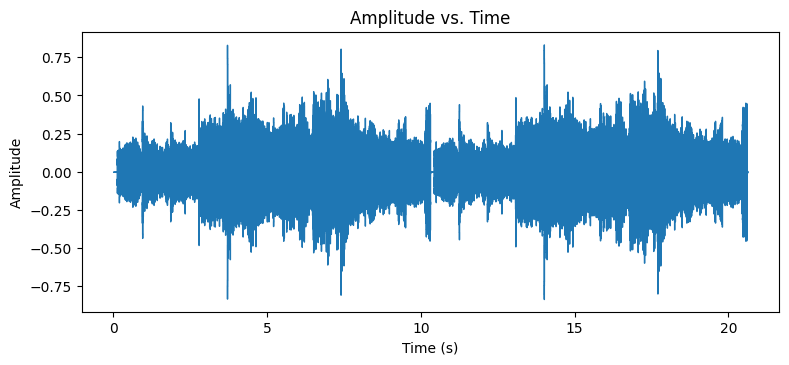

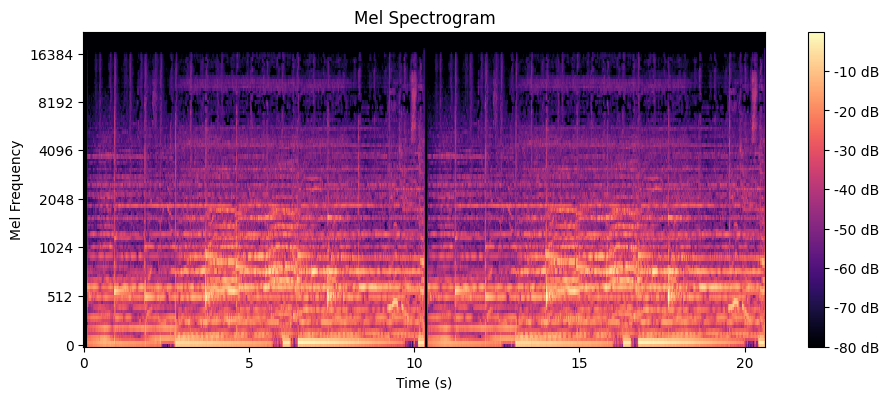

In [ ]:
y, sr = librosa.load(audio_path, sr=None)

# Plot the amplitude vs. time
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Amplitude vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Compute the mel spectrogram for the audio
mel_spectrogram = compute_mel_spectrogram(audio_path)

# Plot the mel spectrogram
plt.figure(figsize=(11, 9))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')


In [ ]:
import numpy as np

def rabin_karp(arr, length):
    base = 26
    modulus = 2**31

    # Compute the hash of the first substring
    hash_val = 0
    for i in range(length):
        hash_val = (hash_val * base + arr[i]) % modulus

    # Store the hash values of substrings
    seen = {hash_val}
    base_power_length = pow(base, length, modulus)

    for i in range(1, len(arr) - length + 1):
        # Compute the hash for the new substring based on the previous hash
        hash_val = (hash_val * base - arr[i - 1] * base_power_length + arr[i + length - 1]) % modulus

        if hash_val in seen:
            return i

        seen.add(hash_val)

    return None

def longest_repeating_subarray(arr):
    left, right = 0, len(arr)-1
    longest_length = 0
    first_occurrence, second_occurrence = None, None

    while left <= right:
        mid = (left + right)//2
        found_index = rabin_karp(arr, mid)

        if found_index is not None:
            longest_length = mid
            first_occurrence = found_index
            second_occurrence = found_index + mid
            left = mid + 1
        else:
            right = mid - 1

    return first_occurrence, second_occurrence, longest_length

In [ ]:
array=np.array(y)
first_occurrence, second_occurrence, length = longest_repeating_subarray(y)

print("Starting positions and lengths of longest repeating subarray:")
print("Occurrence 1:")
print("Starting position:", first_occurrence)
print("Occurrence 2:")
print("Starting position:", second_occurrence)
print("Length:", length)

Starting positions and lengths of longest repeating subarray:
Occurrence 1:
Starting position: 1
Occurrence 2:
Starting position: 459087
Length: 459086


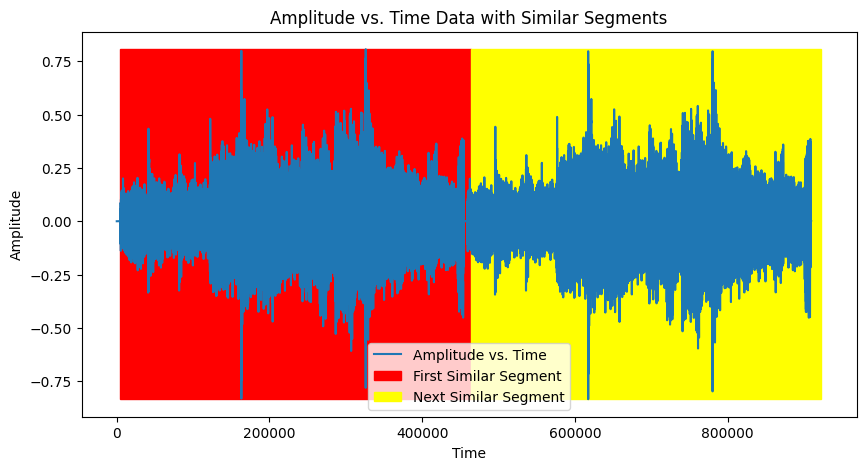

In [ ]:
# Plot the amplitude vs. time data
plt.figure(figsize=(10, 5))

plt.plot(np.array(y), label='Amplitude vs. Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')

start1,start2,ma=first_occurrence+4440, second_occurrence+4440, length
# Overlay rectangles for segments with maximum similarity
rect1 = patches.Rectangle((start1, min(y)), ma, max(array)-min(array), linewidth=1, edgecolor='red', facecolor='red', label='First Similar Segment')
rect2 = patches.Rectangle((start2, min(array)), ma, max(array)-min(array), linewidth=1, edgecolor='yellow', facecolor='yellow', label='Next Similar Segment')
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.legend()

plt.title('Amplitude vs. Time Data with Similar Segments')
plt.show()

128


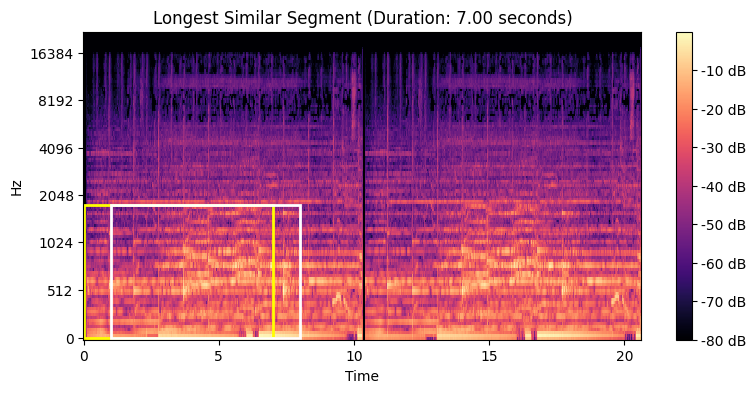

In [ ]:
# Parameters for segment comparison

# Get the number of time frames (segments) in the mel spectrogram
num_frames = mel_spectrogram.shape[1]


# Calculate the time duration of each frame (segment)
duration = librosa.get_duration(path=audio_path)
time_per_frame = duration / num_frames

print(len(mel_spectrogram))
# Initialize variables to keep track of the longest similar segment
max_segment_duration = 0
max_segment_start = 0
max_second_segment_start = 0

# Iterate through the mel spectrogram and check for repetitions
for i in range(num_frames):
    for j in range(i + 1, num_frames):
        count = 0
        m = i
        n = j
        # Check if the segments are the same
        if np.array_equal(mel_spectrogram[:, m], mel_spectrogram[:, n]):
            while np.array_equal(mel_spectrogram[:, m], mel_spectrogram[:, n]):
                count += 1
                m += 1
                n += 1

        # Check if the segment is the longest so far
        if count>= max_segment_duration:
            max_segment_duration = count
            max_segment_start = i
            max_second_segment_start =j

# Plot the mel spectrogram
plt.figure(figsize=(9,4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel',sr=sr)

# Add a rectangle to the plot to highlight the longest similar segment
rect1=patches.Rectangle((max_segment_start, 0), max_segment_duration, len(mel_spectrogram[0]), linewidth=2, edgecolor='yellow', facecolor='none')
plt.gca().add_patch(rect1)
rect2 = patches.Rectangle((max_second_segment_start, 0), max_segment_duration, len(mel_spectrogram[0]), linewidth=2, edgecolor='white', facecolor='none')
plt.gca().add_patch(rect2)

# Show the plot
plt.title(f'Longest Similar Segment (Duration: {max_segment_duration:.2f} seconds)')
plt.colorbar(format='%+2.0f dB')
plt.show()